In [1]:
import scvelo as scv
import numpy as np
import pandas as pd
import scipy
import scanpy as sc

In [11]:
adata = scv.read("../velocyto/10X_multiome_mouse_brain.loom", cache = True)

In [12]:
adata.obs_names = [x.split(':')[1][:-1] + '-1' for x in adata.obs_names]
adata.var_names_make_unique()

In [13]:
cell_annot = pd.read_csv('../cell_annotations.tsv', sep='\t', index_col=0)

In [14]:
adata = adata[cell_annot.index,:]
adata.obs['celltype'] = cell_annot['celltype']

In [15]:
adata = adata[adata.obs['celltype'].isin(['RG, Astro, OPC', 
                                                      'IPC', 
                                                      'V-SVZ', 
                                                      'Upper Layer', 
                                                      'Deeper Layer', 
                                                      'Ependymal cells', 
                                                      'Subplate'])]

In [16]:
adata.obs['celltype'] = cell_annot.loc[adata.obs_names, 'celltype']
adata.obs['celltype'] = adata.obs['celltype'].astype('category')

saving figure to file figure/mouse_e18_proportions.png


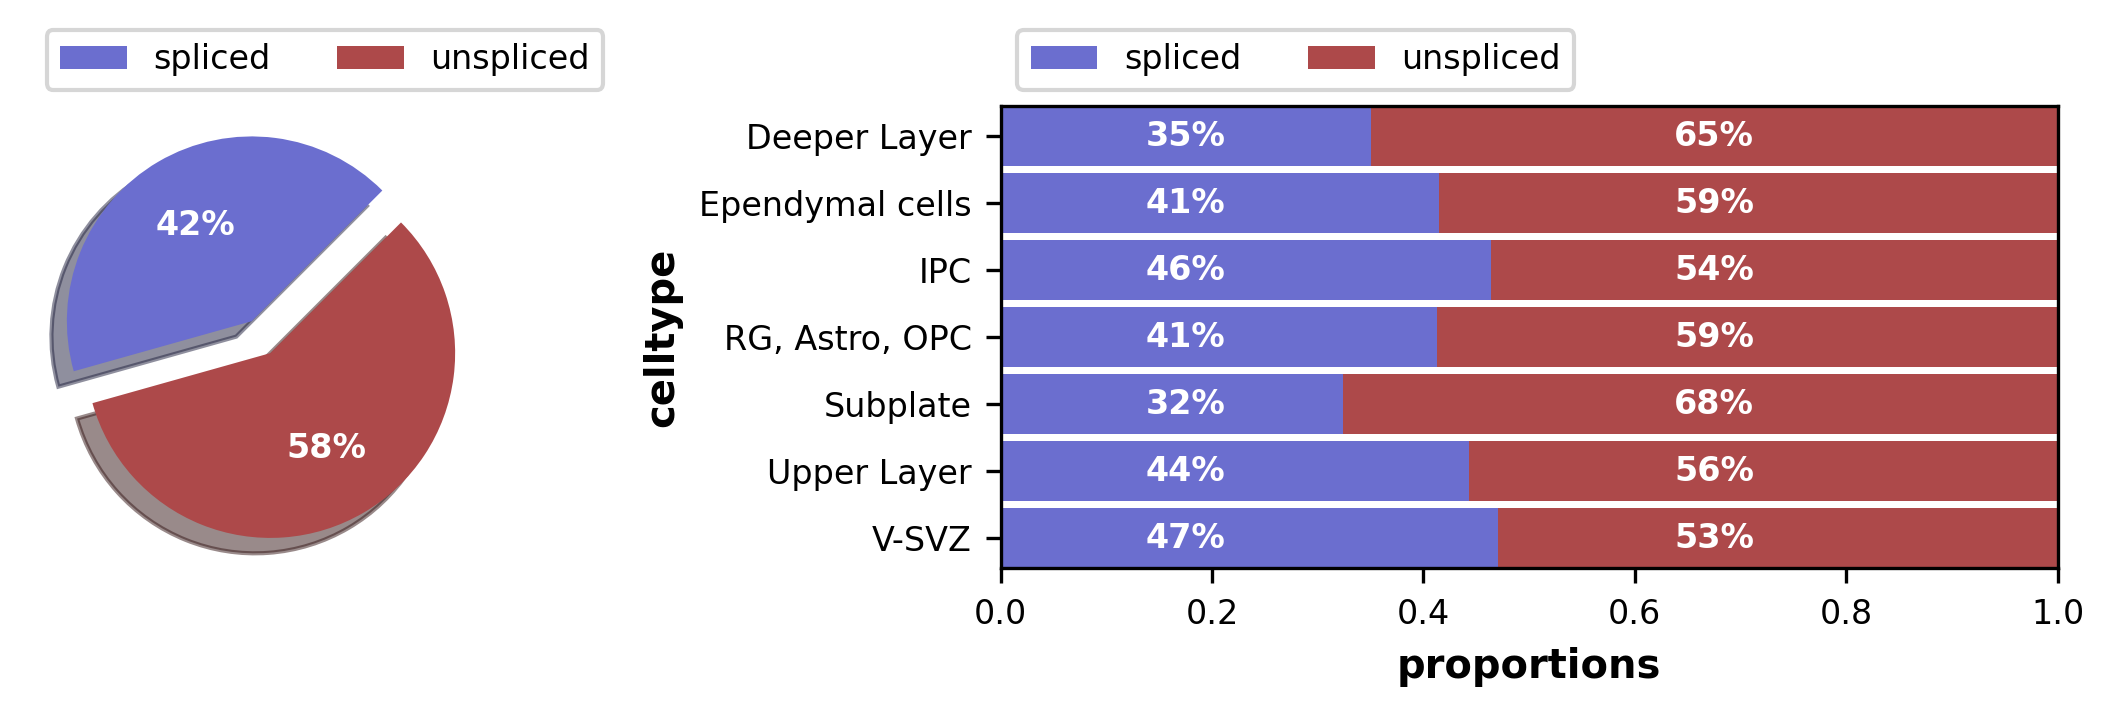

In [17]:
scv.pl.proportions(adata, groupby = "celltype", save = "figure/mouse_e18_proportions.png", dpi = 300, layers = ["spliced", "unspliced"])

In [18]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 23038 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [19]:
sc.tl.leiden(adata)

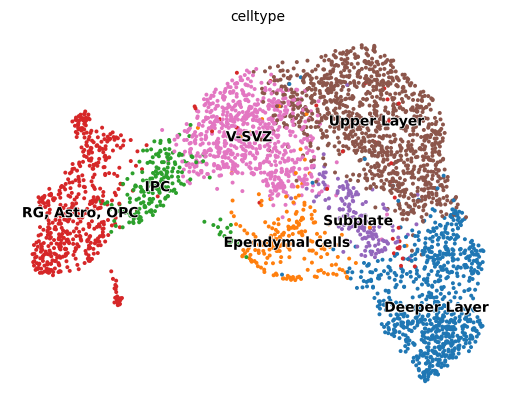

In [20]:
scv.tl.umap(adata)
scv.pl.umap(adata, color='celltype')

In [21]:
scv.tl.recover_dynamics(adata, n_jobs = 16)

recovering dynamics (using 16/24 cores)


  0%|          | 0/1475 [00:00<?, ?gene/s]

    finished (0:00:39) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [22]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [23]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/24 cores)


  0%|          | 0/3653 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [24]:
scv.tl.latent_time(adata)

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


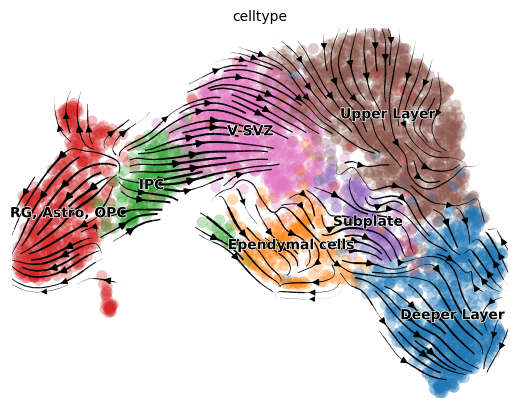

In [3]:
scv.pl.velocity_embedding_stream(adata, basis = "umap", color = "celltype")

In [4]:
adata.write_h5ad("data/scvelo.h5ad")